# **Approche ML supervisé sur les séries temporelles**

On a vu jusqu'ici des modèles "classiques" de séries temporelles mais on peut aussi utiliser des modèles moins complexes tels qu'une simple régression linéaire ou un arbre de régression. En revanche pour cette approche il faut travailler un peu sur le format des données. Alors en route !

## **1. Import et preprocessing des données**

1. Récupérer les données de Google sur Yahoo!Finance (c'est la colonne "close" qui nous intéressera). Prendre tout l'historique (depuis le 19 août 2004)
2. Pour vous rafraîchir un peu la mémoire :
>- les charger en un objet série temporelle avec pandas,
>- modifier la fréquence pour être en "jours ouvrables"
>- afficher la série
3. Créer vos échantillons d'entraînement et de test en précisant la stratégie utilisée
4. Scaler vos données. C'est pas toujours nécessaires mais sans entrer dans des considérations trop matheuses, il vaut mieux le faire (généralement une normalisation min-max ou un standard scaler selon les modèles)
5. Transformer vos données de sorte qu'elles puissent servir pour entraîner un modèle ML, c'est-à-dire qu'on veut une matrice X d'inputs et un vecteur y de targets. Pour ça, vous devez vous demander, qu'est-ce que je veux prédire et avec quoi ?

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18, 8)

In [124]:
df = pd.read_csv("data/GOOG.csv", parse_dates=['Date'], index_col='Date', usecols=['Date', 'Close'])
df.isna().sum()

Close    0
dtype: int64

In [125]:
df = df.asfreq('B', method='ffill')
df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18'],
              dtype='datetime64[ns]', name='Date', length=4805, freq='B')

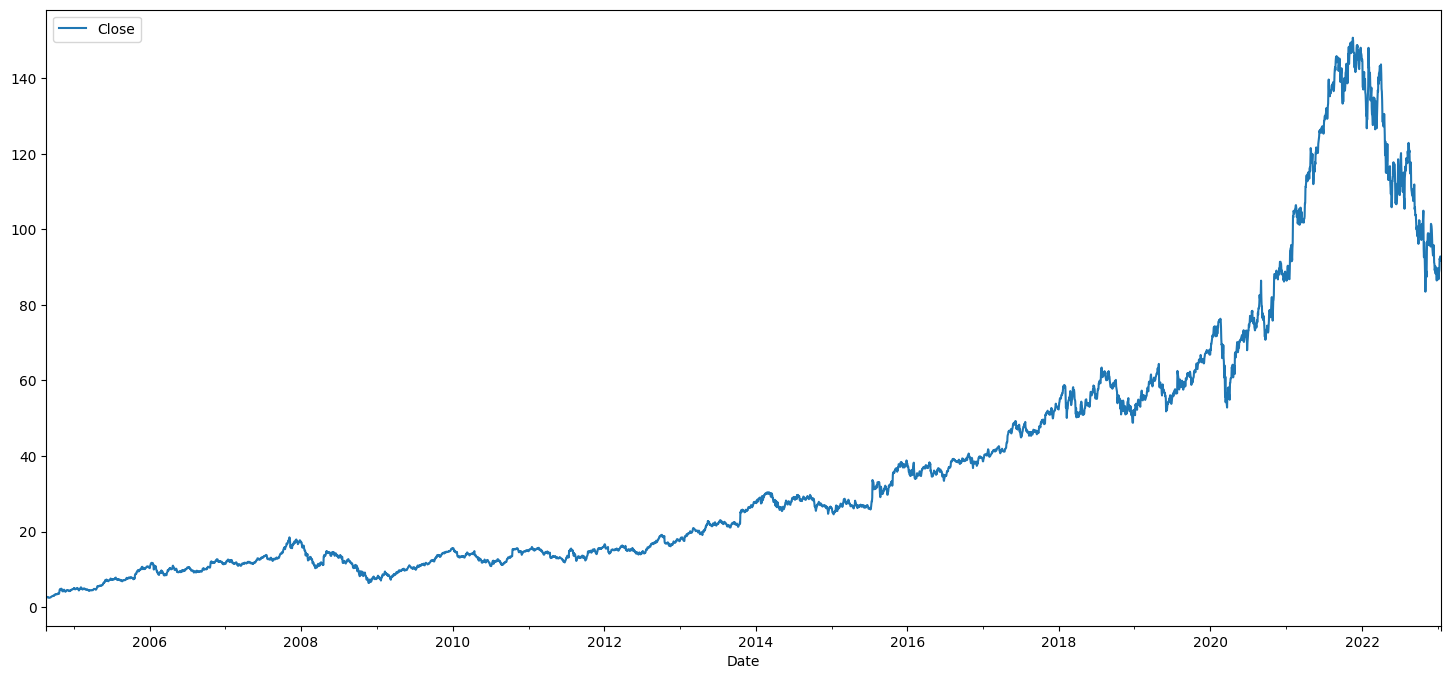

In [126]:
df.plot()
plt.draw()

In [127]:
df.shape

(4805, 1)

In [128]:
# 3. Echantillon d'entrainement et de test en précisant la stratégie utilisée
# Nous allons utiliser une aproche pour prédire une valeur t à partir des t-40 valeur précédentes. Ainsi nous allons
# créer comme dans un modèle normal notre matrice de feature et de label.

timesteps = 40
X = []
y = []

for i in range(timesteps, df.shape[0]): # on a fait le shape[0] pour prendre juste en compte le nombre de lignes
    X.append(df.iloc[i-timesteps:i, 0])
    y.append(df.iloc[i, 0])

X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(4765, 40) (4765,)


In [129]:
X[:4,:], y[:4]

(array([[2.499133, 2.697639, 2.724787, 2.61196 , 2.640104, 2.687676,
         2.64384 , 2.540727, 2.549693, 2.496891, 2.528273, 2.490913,
         2.490913, 2.530017, 2.54795 , 2.548199, 2.623417, 2.677464,
         2.776842, 2.789544, 2.83861 , 2.926282, 2.972857, 2.934999,
         2.948448, 3.009221, 2.984563, 2.94546 , 3.159657, 3.264763,
         3.227901, 3.302123, 3.363891, 3.446332, 3.414203, 3.458287,
         3.430392, 3.368873, 3.422173, 3.509346],
        [2.697639, 2.724787, 2.61196 , 2.640104, 2.687676, 2.64384 ,
         2.540727, 2.549693, 2.496891, 2.528273, 2.490913, 2.490913,
         2.530017, 2.54795 , 2.548199, 2.623417, 2.677464, 2.776842,
         2.789544, 2.83861 , 2.926282, 2.972857, 2.934999, 2.948448,
         3.009221, 2.984563, 2.94546 , 3.159657, 3.264763, 3.227901,
         3.302123, 3.363891, 3.446332, 3.414203, 3.458287, 3.430392,
         3.368873, 3.422173, 3.509346, 3.536743],
        [2.724787, 2.61196 , 2.640104, 2.687676, 2.64384 , 2.540727,
   

In [130]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Feature-scaling: normalisation min-max
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # Il ne faut pas s'entrainer sur le test

## **2. Une régression linéaire simple**

1. Entraîner une régression linéaire. Mesurer et stocker la durée d'entraînement dans le dataframe `comparison` ci-dessous. 
2. Faire les prédictions sur l'échantillon test en mesurant et stockant la vitesse de prédiction dans`comparison`.
3. Mesurer les erreurs de prédiction avec les métriques listées dans `comparison` et les stocker également.
4. Visualiser les prédictions de votre modèle

```python
comparison = pd.DataFrame(
    index = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Other model', 'And another model'],
    columns=['Training time', 'Prediction time', 'RMSE', 'nRMSE', 'MAE', 'nMAE']
)
```

In [131]:
comparison = pd.DataFrame(
    index = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Other model', 'And another model'],
    columns=['Training time', 'Prediction time', 'RMSE', 'nRMSE', 'MAE', 'nMAE']
)
comparison

Training time Prediction time RMSE nRMSE  MAE nMAE
Linear Regression           NaN             NaN  NaN   NaN  NaN  NaN
Decision Tree               NaN             NaN  NaN   NaN  NaN  NaN
Random Forest               NaN             NaN  NaN   NaN  NaN  NaN
Other model                 NaN             NaN  NaN   NaN  NaN  NaN
And another model           NaN             NaN  NaN   NaN  NaN  NaN

In [132]:
import time
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model training
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Model predictions
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# RMSE and nRMSE calcul
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
nrmse = rmse / (y_test.max() - y_test.min())

# MAE and nMAE calcul
mae = mean_absolute_error(y_test, y_pred)
nmae = mae / (y_test.max() - y_test.min())

# Results
comparison.iloc[0,0] = training_time
comparison.iloc[0,1] = prediction_time
comparison.iloc[0,2] = rmse
comparison.iloc[0,3] = nrmse
comparison.iloc[0,4] = mae
comparison.iloc[0,5] = nmae

comparison

Training time Prediction time      RMSE     nRMSE       MAE  \
Linear Regression      0.069516        0.015319  0.968456  0.006631  0.485433   
Decision Tree               NaN             NaN       NaN       NaN       NaN   
Random Forest               NaN             NaN       NaN       NaN       NaN   
Other model                 NaN             NaN       NaN       NaN       NaN   
And another model           NaN             NaN       NaN       NaN       NaN   

                       nMAE  
Linear Regression  0.003324  
Decision Tree           NaN  
Random Forest           NaN  
Other model             NaN  
And another model       NaN

In [133]:
y_pred

array([ 21.93185373,   7.2508037 ,  11.74256916,  59.31136166,
        15.00841678,   7.81066526,   9.88221808,  35.99045441,
        87.17971987,  37.95764653,  11.69018768,  15.43119709,
        50.67113409, 133.4235168 ,  37.09548743,  58.45854682,
       120.82617415,  71.85100123,   7.29627846, 143.37457828,
        52.1424109 ,  15.77280623,  51.0820997 ,  15.38921013,
        49.09925649,  15.87314177,  13.64105672,  86.92700819,
        53.30982732,  37.7188029 ,  14.57137635,  14.70806923,
        47.29944774,  28.79336968,  10.42553318,  35.97227448,
        27.72387813,  13.26628713,  12.48995802,  25.37113348,
        35.8574542 ,  15.88581496,  28.16437654,  58.45753993,
        12.10258193,  17.48491517,  54.16095763,  37.53648981,
        10.31808402,   4.69233712,  41.49900468,  11.81469232,
        10.67943845,  57.82327568,  16.80501712,  68.86055893,
        53.52095949,  26.66682273,  57.56134298,  14.43428262,
        20.06302   ,  17.29191752,  19.82836983,  21.93

## **3. Comparaison de différents modèles**

1. Répéter les questions 2.1, 2.2 et 2.3 pour remplir le dataframe `comparison` avec différents modèles : un arbre de régression et une forêt aléatoire, un GradientBoosting (et éventuellement un ExtremeGradientBoosting). Si vous le sentez vous pouvez aussi ajouter un SARIMA.
2. Visualiser les prédictions de tous ces modèles sur un même graphique

In [134]:
#! pip install xgboost

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb # For the model ExtremeGradientBoosting

models = []
params = {'objective':'reg:squarederror','colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

models.append(DecisionTreeRegressor(max_depth=5, random_state=0))
models.append(RandomForestRegressor(n_estimators=50))
models.append(GradientBoostingRegressor(random_state=0))
# models.append(xgb.XGBRegressor(**params))

i = 1
for i, model in enumerate(models):
    # Model fiting
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Model predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    # RMSE and nRMSE calcul
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    nrmse = rmse / (y_test.max() - y_test.min())

    # MAE and nMAE calcul
    mae = mean_absolute_error(y_test, y_pred)
    nmae = mae / (y_test.max() - y_test.min())

    # Results
    comparison.iloc[i+1,0] = training_time
    comparison.iloc[i+1,1] = prediction_time
    comparison.iloc[i+1,2] = rmse
    comparison.iloc[i+1,3] = nrmse
    comparison.iloc[i+1,4] = mae
    comparison.iloc[i+1,5] = nmae

In [136]:
comparison

Training time Prediction time      RMSE     nRMSE       MAE  \
Linear Regression      0.069516        0.015319  0.968456  0.006631  0.485433   
Decision Tree           0.07055        0.000951   1.49894  0.010263  1.094355   
Random Forest          2.932535        0.007497  1.021833  0.006996  0.515343   
Other model            2.838387        0.001858  1.044549  0.007152  0.564483   
And another model           NaN             NaN       NaN       NaN       NaN   

                       nMAE  
Linear Regression  0.003324  
Decision Tree      0.007493  
Random Forest      0.003528  
Other model        0.003865  
And another model       NaN